<a href="https://colab.research.google.com/github/seuriratcha/DataAnalytics_practice/blob/main/%08Commerce_Marketing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)
%matplotlib inline

In [ ]:
# 전처리한 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/EXPORT/Data Analyst/merge_trans_cust_prod.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            22933 non-null  int64  
 1   dob                22933 non-null  object 
 2   age                22933 non-null  int64  
 3   gender             22933 non-null  object 
 4   city_code          22933 non-null  float64
 5   order_status       22933 non-null  object 
 6   confirmed_yn       22933 non-null  float64
 7   transaction_id     22933 non-null  int64  
 8   tran_date          22933 non-null  object 
 9   prod_cat_code      22933 non-null  int64  
 10  prod_sub_cat_code  22933 non-null  int64  
 11  prod_cat           22933 non-null  object 
 12  prod_subcat        22933 non-null  object 
 13  qty                22933 non-null  int64  
 14  rate               22933 non-null  int64  
 15  tax                22933 non-null  float64
 16  total_amt          229

In [ ]:
# 날짜 형식으로 데이터 타입 지정
df['dob'] = pd.to_datetime(df['dob'])
df['tran_date'] = pd.to_datetime(df['tran_date'])

# Data Preprocessing & Exploratory Data Analysis

### 5세 단위 연령 구간 나누기
2011년 시점을 기준으로 5세 단위로 연령 구간을 나누고 각 성별(gender), 연령 구간별로 고객 수를 Python 코드를 이용하여 집계해 주세요. (단, 고객의 성별, 연령 정보를 구할 수 없을 경우 해당 데이터는 집계에서 제외해 주세요.)

In [ ]:
# 2011년 시점 age 파생 컬럼 생성을 위해 dob 데이터에서 연도만 추출 후 2011 기준으로 나이를 추출
df['birth_year'] = df['dob'].dt.year
df['age_2011'] = 2011 - df['birth_year']
df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type,birth_year,age_2011
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop,1975,36
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR,1970,41
2,272671,1974-04-01,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store,1974,37
3,271544,1986-05-08,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop,1986,25
4,273203,1984-02-29,29,M,2.0,Ordered,1.0,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop,1984,27


In [ ]:
# 2011년 기준 연령 5세 단위로 구분
df['age_category'] = pd.cut(df['age_2011'], bins=range(0, 101, 5), labels=[f'{i}-{i+4}' for i in range(0, 100, 5)], right=False)
df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,...,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type,birth_year,age_2011,age_category
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,...,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop,1975,36,35-39
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,...,Books,Academic,4,1385,581.700,6121.700,MBR,1970,41,40-44
2,272671,1974-04-01,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,...,Bags,Women,2,103,21.630,227.630,Flagship store,1974,37,35-39
3,271544,1986-05-08,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,...,Books,Academic,1,299,31.395,330.395,e-Shop,1986,25,25-29
4,273203,1984-02-29,29,M,2.0,Ordered,1.0,16165359,2013-08-01,1,...,Clothing,Mens,2,580,121.800,1281.800,e-Shop,1984,27,25-29


In [ ]:
# 'birth_year' 컬럼 삭제
df = df.drop(['birth_year'], axis=1)


# 칼럼명 위치 조정
desired_order = [
    'cust_id', 'dob', 'age','age_2011', 'age_category', 'gender', 'city_code', 'order_status', 'confirmed_yn',
    'transaction_id', 'tran_date', 'prod_cat_code', 'prod_sub_cat_code', 'prod_cat',
    'prod_subcat', 'qty', 'rate', 'tax', 'total_amt', 'store_type'
]
df = df.reindex(columns=desired_order)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cust_id            22933 non-null  int64         
 1   dob                22933 non-null  datetime64[ns]
 2   age                22933 non-null  int64         
 3   age_2011           22933 non-null  int64         
 4   age_category       22933 non-null  category      
 5   gender             22933 non-null  object        
 6   city_code          22933 non-null  float64       
 7   order_status       22933 non-null  object        
 8   confirmed_yn       22933 non-null  float64       
 9   transaction_id     22933 non-null  int64         
 10  tran_date          22933 non-null  datetime64[ns]
 11  prod_cat_code      22933 non-null  int64         
 12  prod_sub_cat_code  22933 non-null  int64         
 13  prod_cat           22933 non-null  object        
 14  prod_s

In [ ]:
# 성별(gender), 연령 구간별 고객 수 집계
customer_counts = df.groupby(['gender', 'age_category']).size().reset_index(name='customer_count')
print(customer_counts)

     gender age_category  customer_count
0         F          0-4               0
1         F          5-9               0
2         F        10-14               0
3         F        15-19             595
4         F        20-24            2439
5         F        25-29            2342
6         F        30-34            2378
7         F        35-39            2463
8         F        40-44             957
9         F        45-49               0
10        F        50-54               0
11        F        55-59               0
12        F        60-64               0
13        F        65-69               0
14        F        70-74               0
15        F        75-79               0
16        F        80-84               0
17        F        85-89               0
18        F        90-94               0
19        F        95-99               0
20        M          0-4               0
21        M          5-9               0
22        M        10-14               0
23        M     

### 연령/성별 통계를 확인할 수 있는 데이터 시각화 자료

#### 성별 파이차트

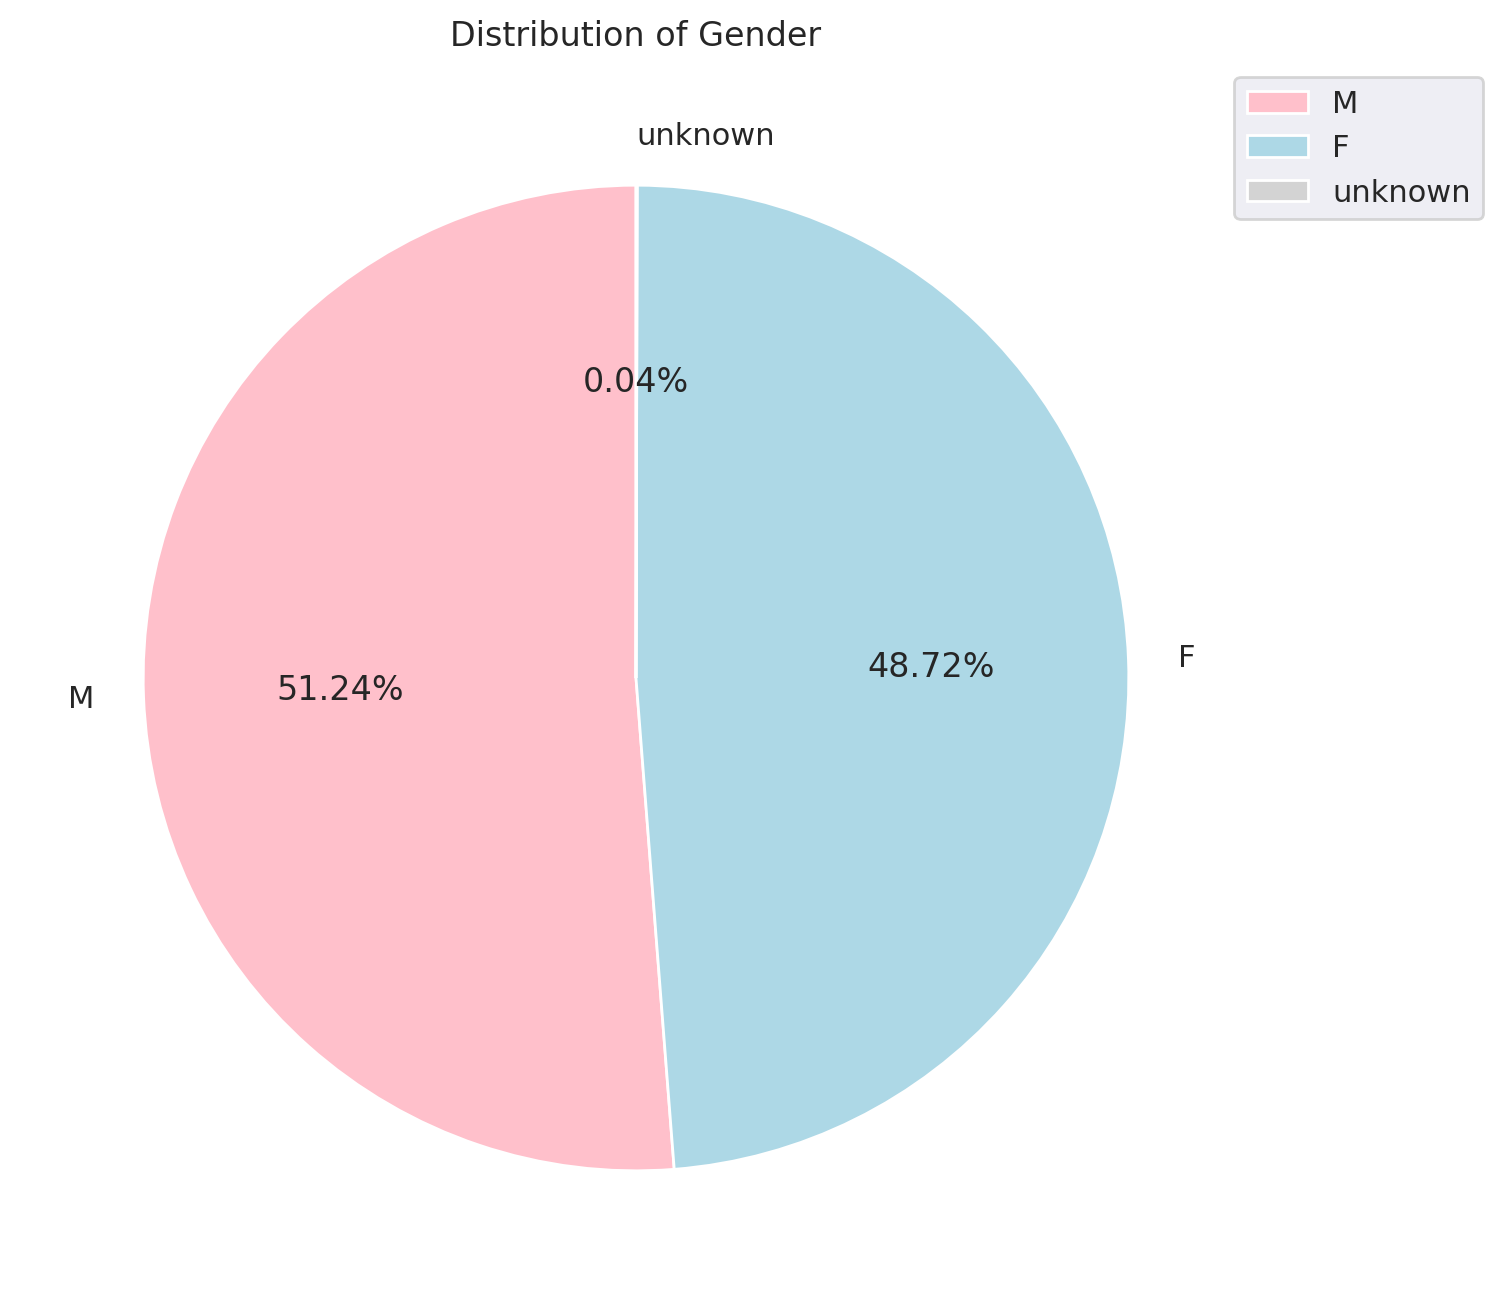

In [ ]:
# 성별 카운트
gender_counts = df['gender'].value_counts()

# 파이차트 생성
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', startangle=90, colors=['pink', 'lightblue', 'lightgray'])
plt.title('Distribution of Gender')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right') # 범례 표시
plt.show()

#### 연령 데이터 시각화

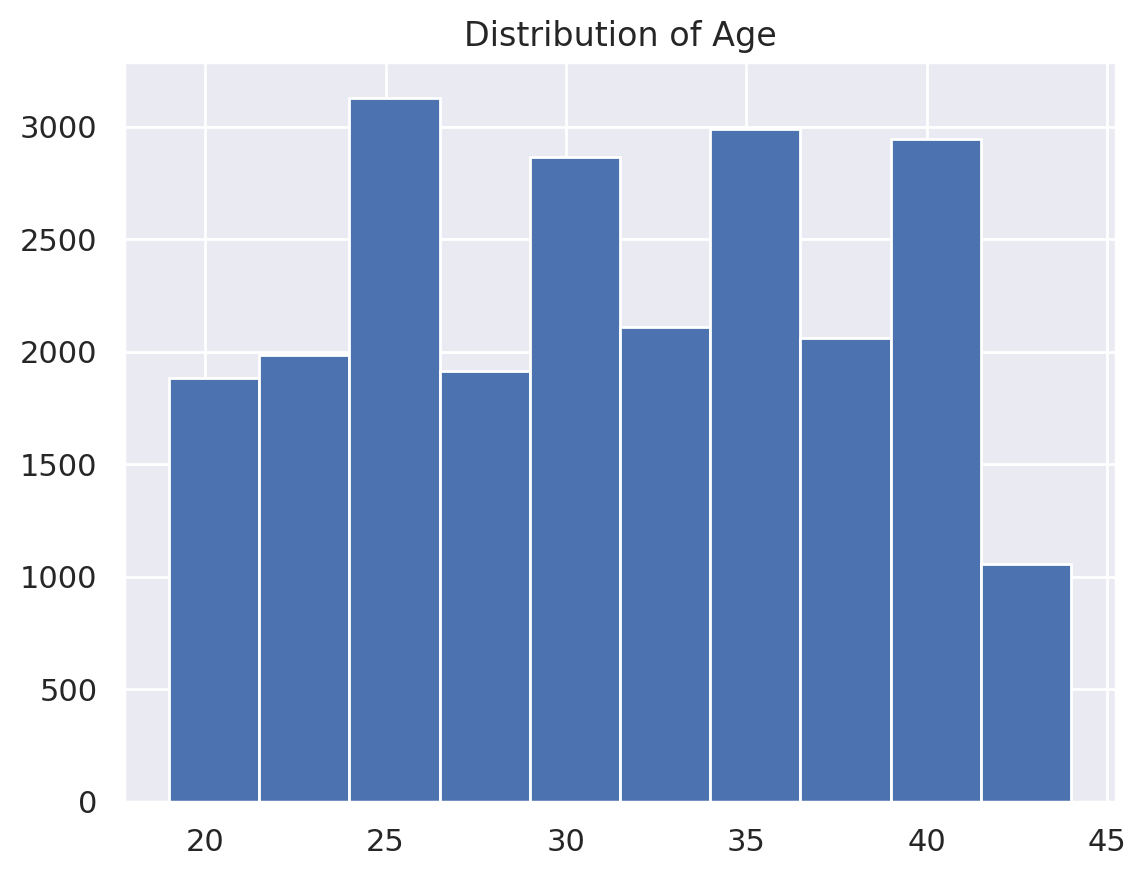

In [ ]:
# 전체 고객 연령대 확인
plt.hist(df['age'])
plt.title('Distribution of Age')
plt.show()

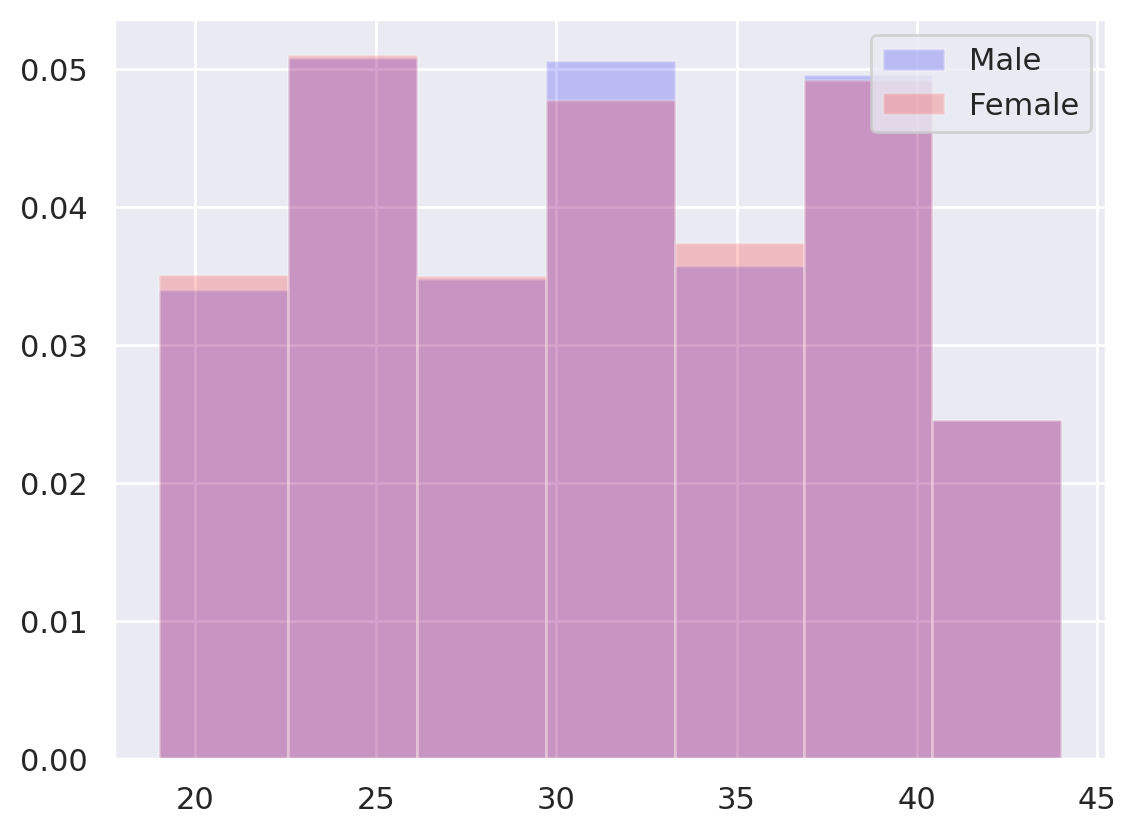

In [ ]:
# 성별을 구분하여 히스토그램 시각화
age_df1 = df[df['gender'].isin(['M'])]
age_df1 = age_df1[['age']]
age_df2 = df[df['gender'].isin(['F'])]
age_df2 = age_df2[['age']]

# 남성, 여성 연령 히스토그램 시각화
plt.hist(age_df1, color = 'blue', alpha = 0.2, bins = 7, label = 'Male', density = True)
plt.hist(age_df2, color = 'red', alpha = 0.2, bins = 7, label = 'Female', density = True)
plt.legend()
plt.show()

### 구매 경과일수 및 구매주기
2013년 2월 28일을 기준으로 각 고객의 구매 경과일수 및 구매주기를 구해주세요.

*   구매 경과일수 = 기준일 - 마지막 구매일
*   구매주기 = (마지막 구매일 - 첫 구매일)/(총 구매 일수 - 1)

In [ ]:
# unique 고객 id
unique_cust_id = list(df["cust_id"].unique())

In [ ]:
# 기준일 날짜 타입 지정
ref_date = pd.to_datetime('2013-02-28')

In [ ]:
a = df.loc[(df["cust_id"]==272172) & (df["order_status"]=="Ordered")]

In [ ]:
a = a[a["tran_date"] <= ref_date]

In [ ]:
a = a.sort_values(by="tran_date", ascending=False)

In [ ]:
ref_date = pd.to_datetime('2013-02-28') # 기준일자
p_pass = []
p_freq = []

for i in unique_cust_id:
  a = df.loc[(df["cust_id"]==i) & (df["order_status"]=="Ordered")]
  a = a[a["tran_date"] <= ref_date]
  a = a.sort_values(by="tran_date",ascending=False) # 기준 일자보다 이전인 구매일 중 최근 것
  if a.empty:
    p = 0
    f = 0
  else:
    p = ref_date - a.iloc[0]["tran_date"] # 구매 경과일수
    f = (a.iloc[0]["tran_date"] - a.iloc[len(a)-1]["tran_date"]) / len(a) # 구매 주기

  p_pass.append(p)
  p_freq.append(f)

In [ ]:
# pur_df 생성
pur_df = pd.DataFrame()

# cust_id, 구매경과일수, 구매주기 칼럼 생성
pur_df["cust_id"] = unique_cust_id
pur_df["days_since_purchase"] = p_pass
pur_df["purchase_freq"] = p_freq

In [ ]:
pur_df

,cust_id,days_since_purchase,purchase_freq
0,272172,279 days 00:00:00,110 days 06:00:00
1,269640,173 days 00:00:00,79 days 00:00:00
2,272671,681 days 00:00:00,0 days 00:00:00
3,271544,157 days 00:00:00,78 days 00:00:00
4,273203,257 days 00:00:00,0 days 00:00:00
...,...,...,...
5501,269582,358 days 00:00:00,0 days 00:00:00
5502,271841,453 days 00:00:00,0 days 00:00:00
5503,267764,0,0
5504,268315,216 days 00:00:00,0 days 00:00:00


#### **구매 경과일수 및 구매주기 별 demo 차이 비교**
위에서 구한 결과에 고객의 연령, 연령 구간, 성별 정보를 결합하여 특정 연령 구간, 성별 간 차이가 있는지 확인해주세요.

In [ ]:
# 위에서 구한 결과에 고객 연령, 구간, 성별정보 결합하기
u_gender = []
u_age = []
u_age_cat = []

for i in unique_cust_id:
  a = df.loc[(df["cust_id"]==i)]["age_2011"]
  u_age.append(a.iloc[0])
  b = df.loc[(df["cust_id"]==i)]["age_category"]
  u_age_cat.append(b.iloc[0])
  c = df.loc[(df["cust_id"]==i)]["gender"]
  u_gender.append(c.iloc[0])

In [ ]:
pur_df["age_2011"] = u_age
pur_df["age_category"] = u_age_cat
pur_df["gender"] = u_gender

In [ ]:
pur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cust_id              5506 non-null   int64 
 1   days_since_purchase  5506 non-null   object
 2   purchase_freq        5506 non-null   object
 3   age_2011             5506 non-null   int64 
 4   age_category         5506 non-null   object
 5   gender               5506 non-null   object
dtypes: int64(2), object(4)
memory usage: 258.2+ KB


In [ ]:
pur_df

,cust_id,days_since_purchase,purchase_freq,age_2011,age_category,gender
0,272172,279,110,36,35-39,M
1,269640,173,79,41,40-44,M
2,272671,681,0,37,35-39,F
3,271544,157,78,25,25-29,F
4,273203,257,0,27,25-29,M
...,...,...,...,...,...,...
5501,269582,358,0,27,25-29,F
5502,271841,453,0,24,20-24,M
5503,267764,0,0,25,25-29,M
5504,268315,216,0,23,20-24,F


In [ ]:
# 타임델타 형식으로 변환
pur_df["days_since_purchase"] = pd.to_timedelta(pur_df["days_since_purchase"])
pur_df["purchase_freq"] = pd.to_timedelta(pur_df["purchase_freq"])

In [ ]:
# int 형태로 변환
pur_df['days_since_purchase'] = pur_df['days_since_purchase'].dt.days
pur_df['purchase_freq'] = pur_df['purchase_freq'].dt.days

In [ ]:
pur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cust_id              5506 non-null   int64 
 1   days_since_purchase  5506 non-null   int64 
 2   purchase_freq        5506 non-null   int64 
 3   age_2011             5506 non-null   int64 
 4   age_category         5506 non-null   object
 5   gender               5506 non-null   object
dtypes: int64(4), object(2)
memory usage: 258.2+ KB


In [ ]:
pur_df_n = pur_df[pur_df['days_since_purchase']>0]
pur_df_n

,cust_id,days_since_purchase,purchase_freq,age_2011,age_category,gender
0,272172,279,110,36,35-39,M
1,269640,173,79,41,40-44,M
2,272671,681,0,37,35-39,F
3,271544,157,78,25,25-29,F
4,273203,257,0,27,25-29,M
...,...,...,...,...,...,...
5500,272606,410,0,33,30-34,F
5501,269582,358,0,27,25-29,F
5502,271841,453,0,24,20-24,M
5504,268315,216,0,23,20-24,F


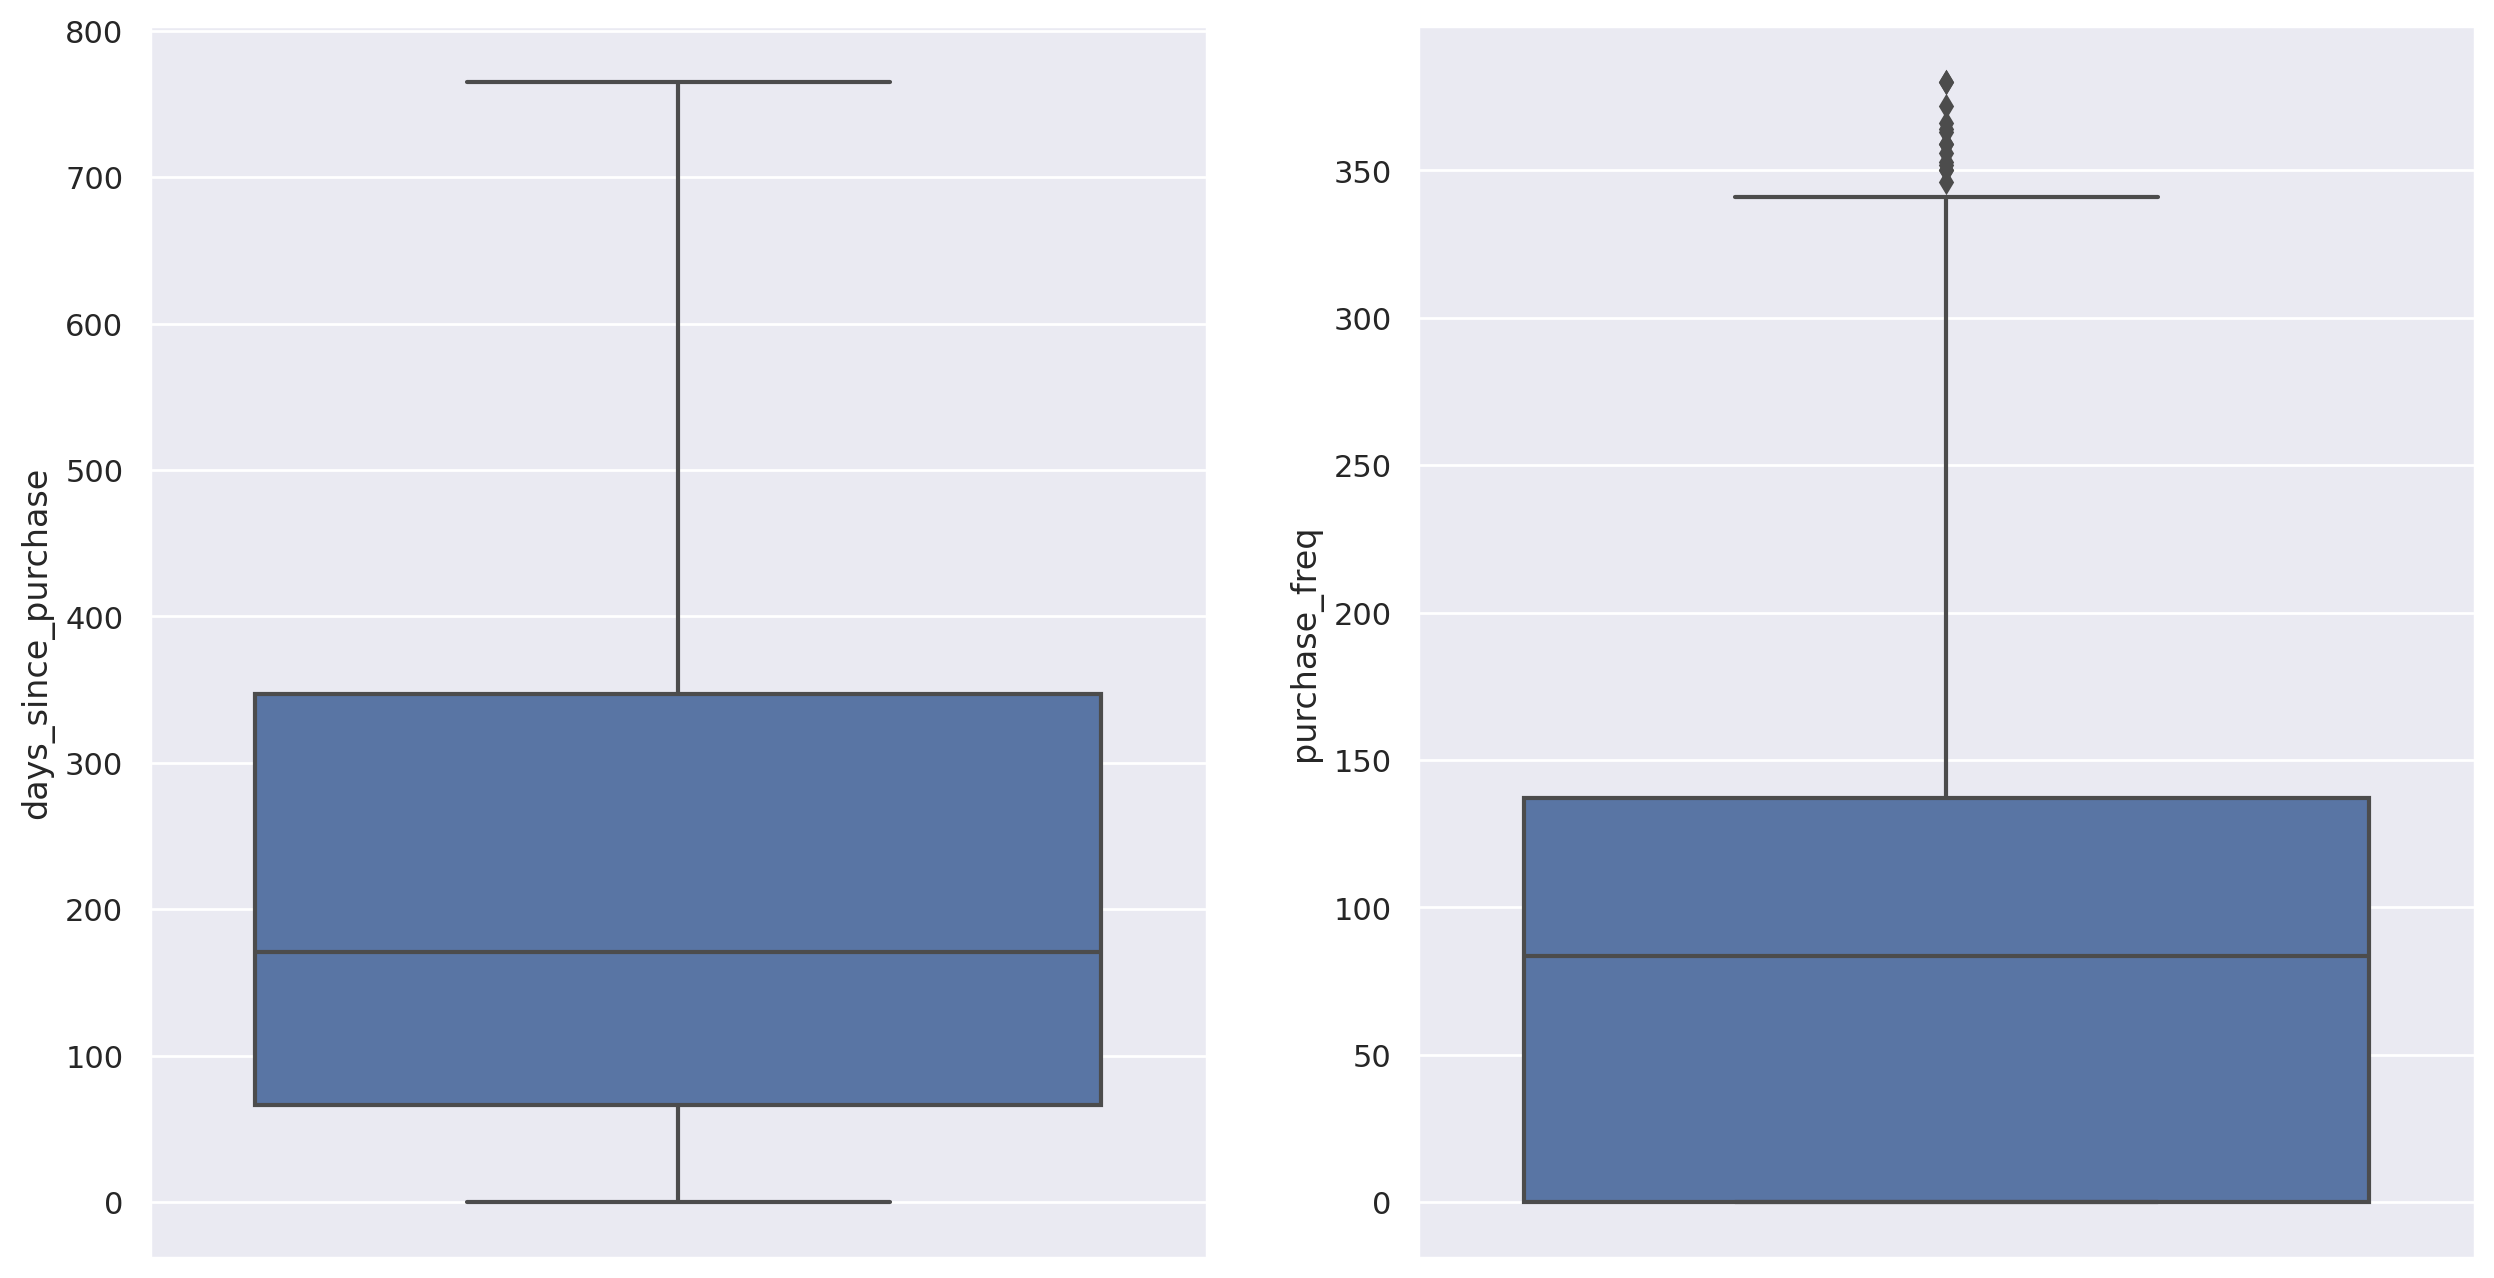

In [ ]:
# 구매 경과일, 구매주기 boxplot
fig, ax = plt.subplots(1,2, figsize=(15, 8))

sns.boxplot(y = 'days_since_purchase', data = pur_df, ax=ax[0])
sns.boxplot(y = 'purchase_freq', data = pur_df, ax=ax[1])
plt.show()

##### 성별 차이 확인

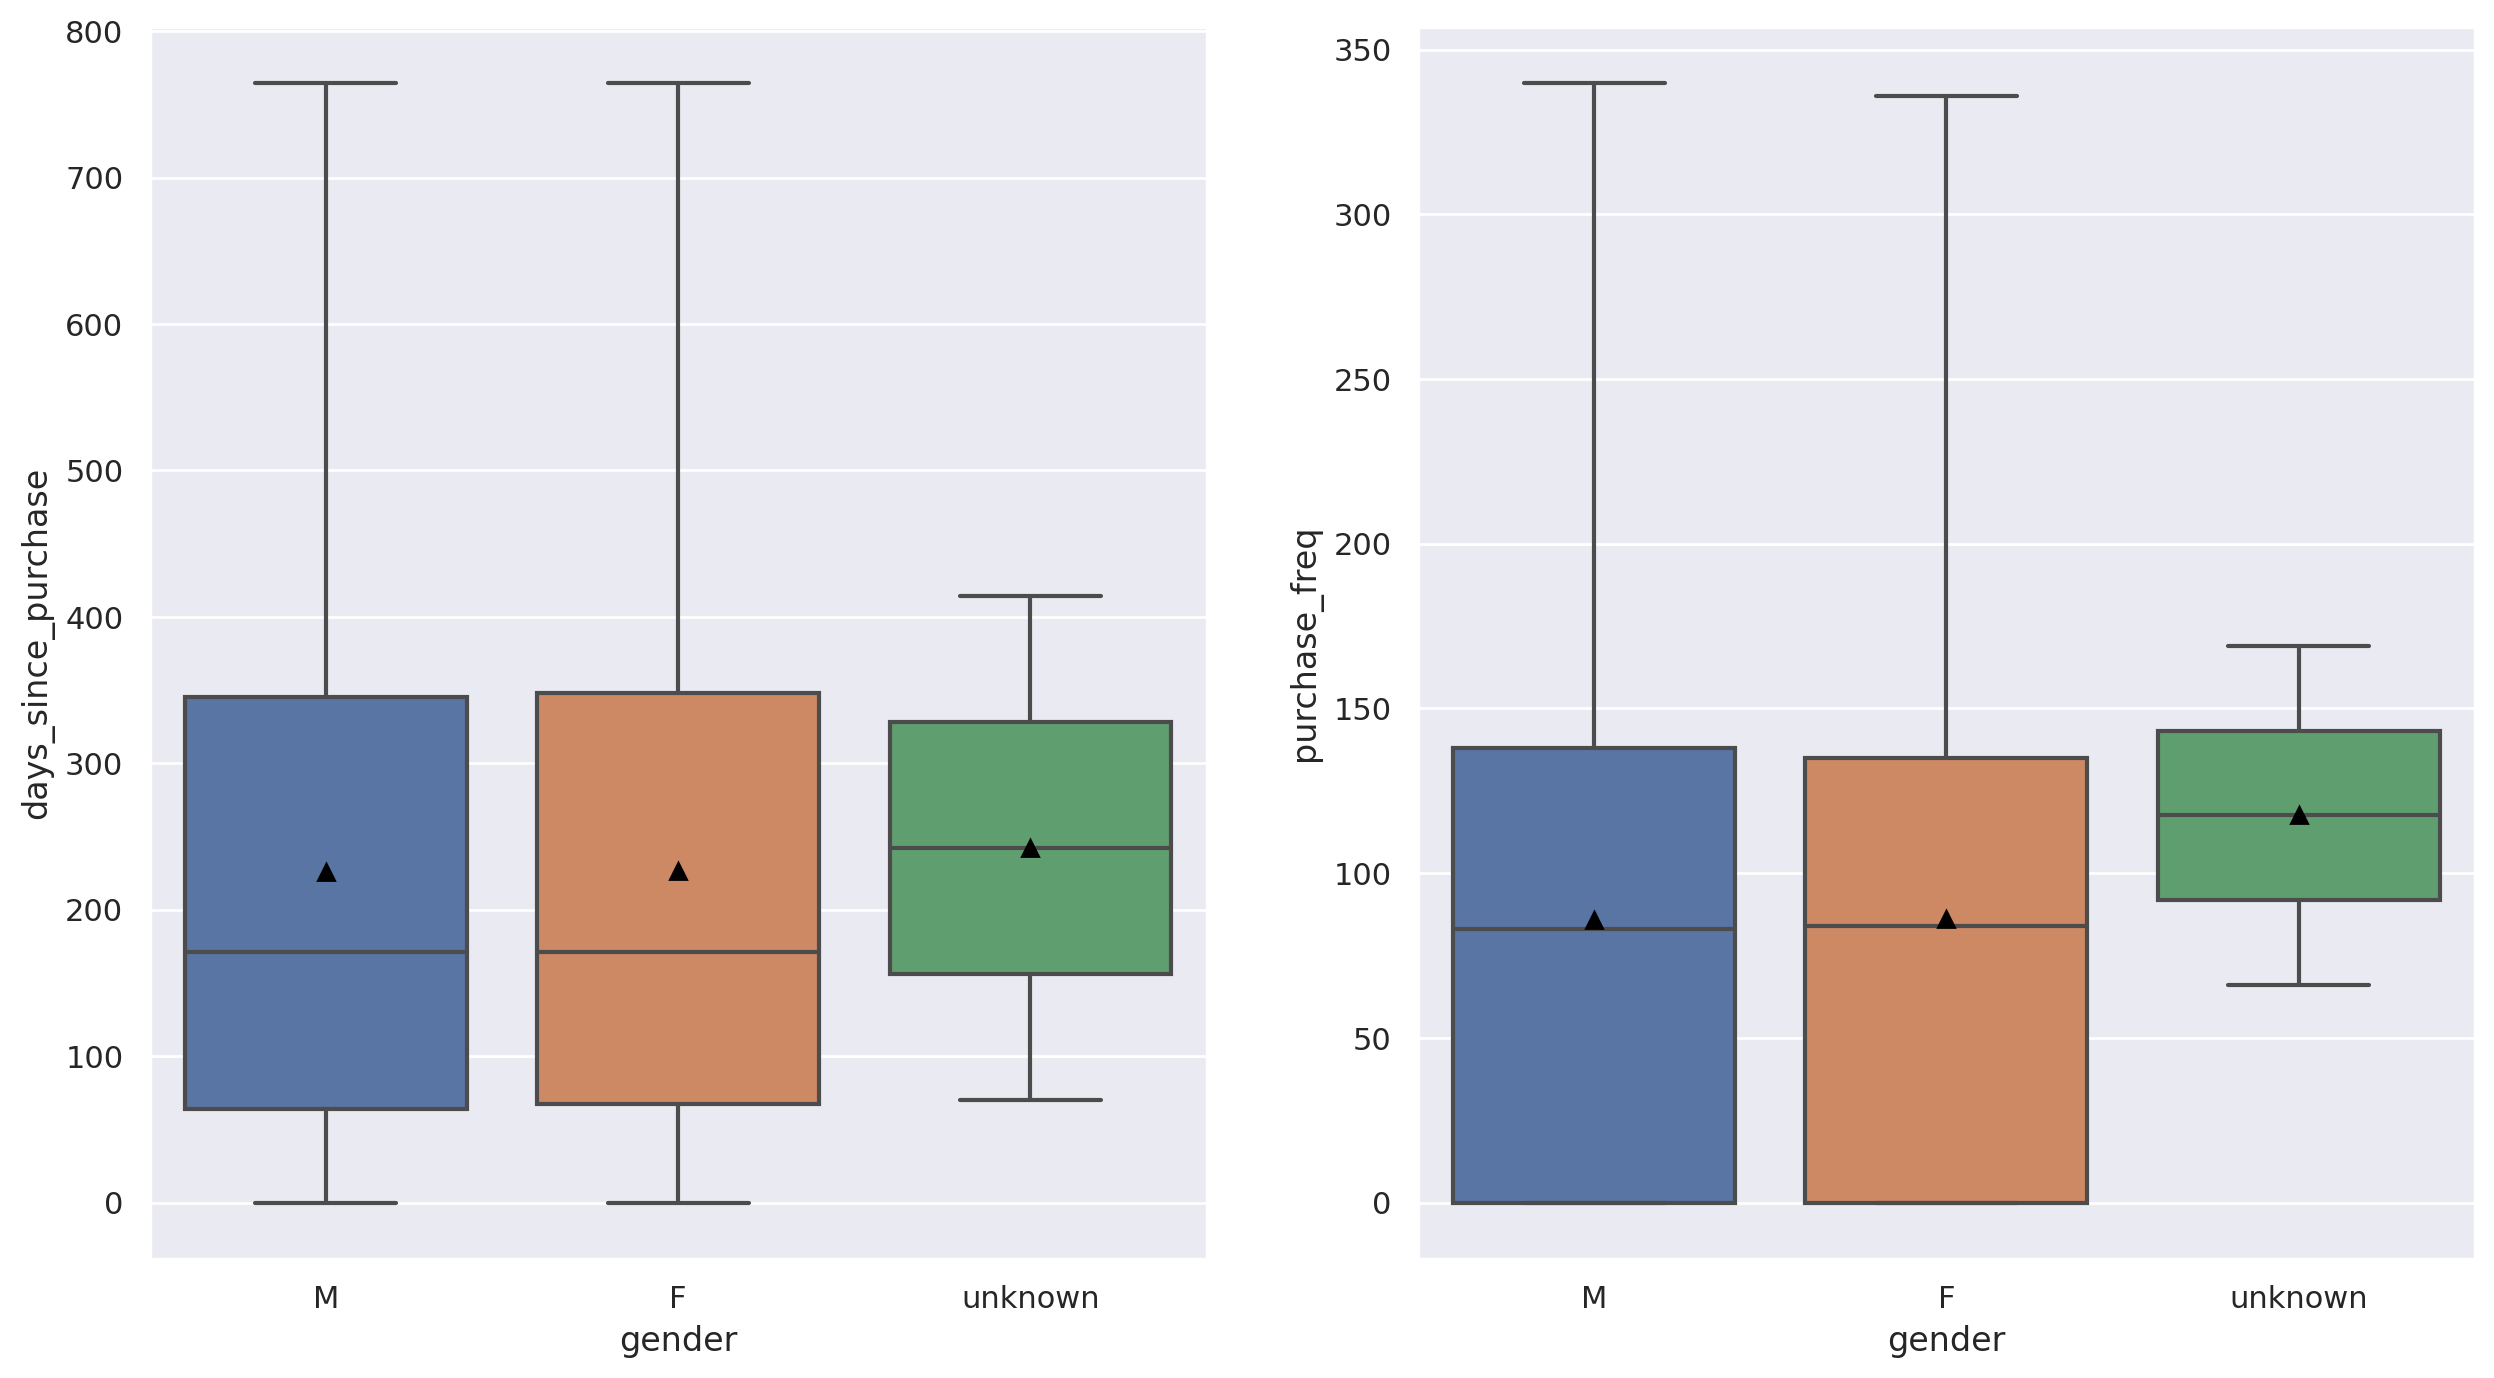

In [ ]:
# 성별 박스플롯
fig, ax = plt.subplots(1,2, figsize=(15, 8))

# 구매 경과일
sns.boxplot(x = 'gender', y = 'days_since_purchase',
            showmeans = True,
            meanprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'},  # 평균 마커 색상 설정
            showfliers=False, # 아웃라이어 표시 안함
            data = pur_df,
            ax=ax[0])

# 구매 주기
sns.boxplot(x = 'gender', y = 'purchase_freq',
            showmeans = True,
            meanprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'},  # 평균 마커 색상 설정
            showfliers=False, # 아웃라이어 표시 안함
            data = pur_df,
            ax=ax[1])

plt.show()

**→ 구매 경과일과 구매 주기 모두 성별 간 유의미한 차이는 나타나지 않는 것으로 보임**

##### 연령대 차이 확인

In [ ]:
pur_df_n['age_category']

NameError: name 'pur_df_n' is not defined

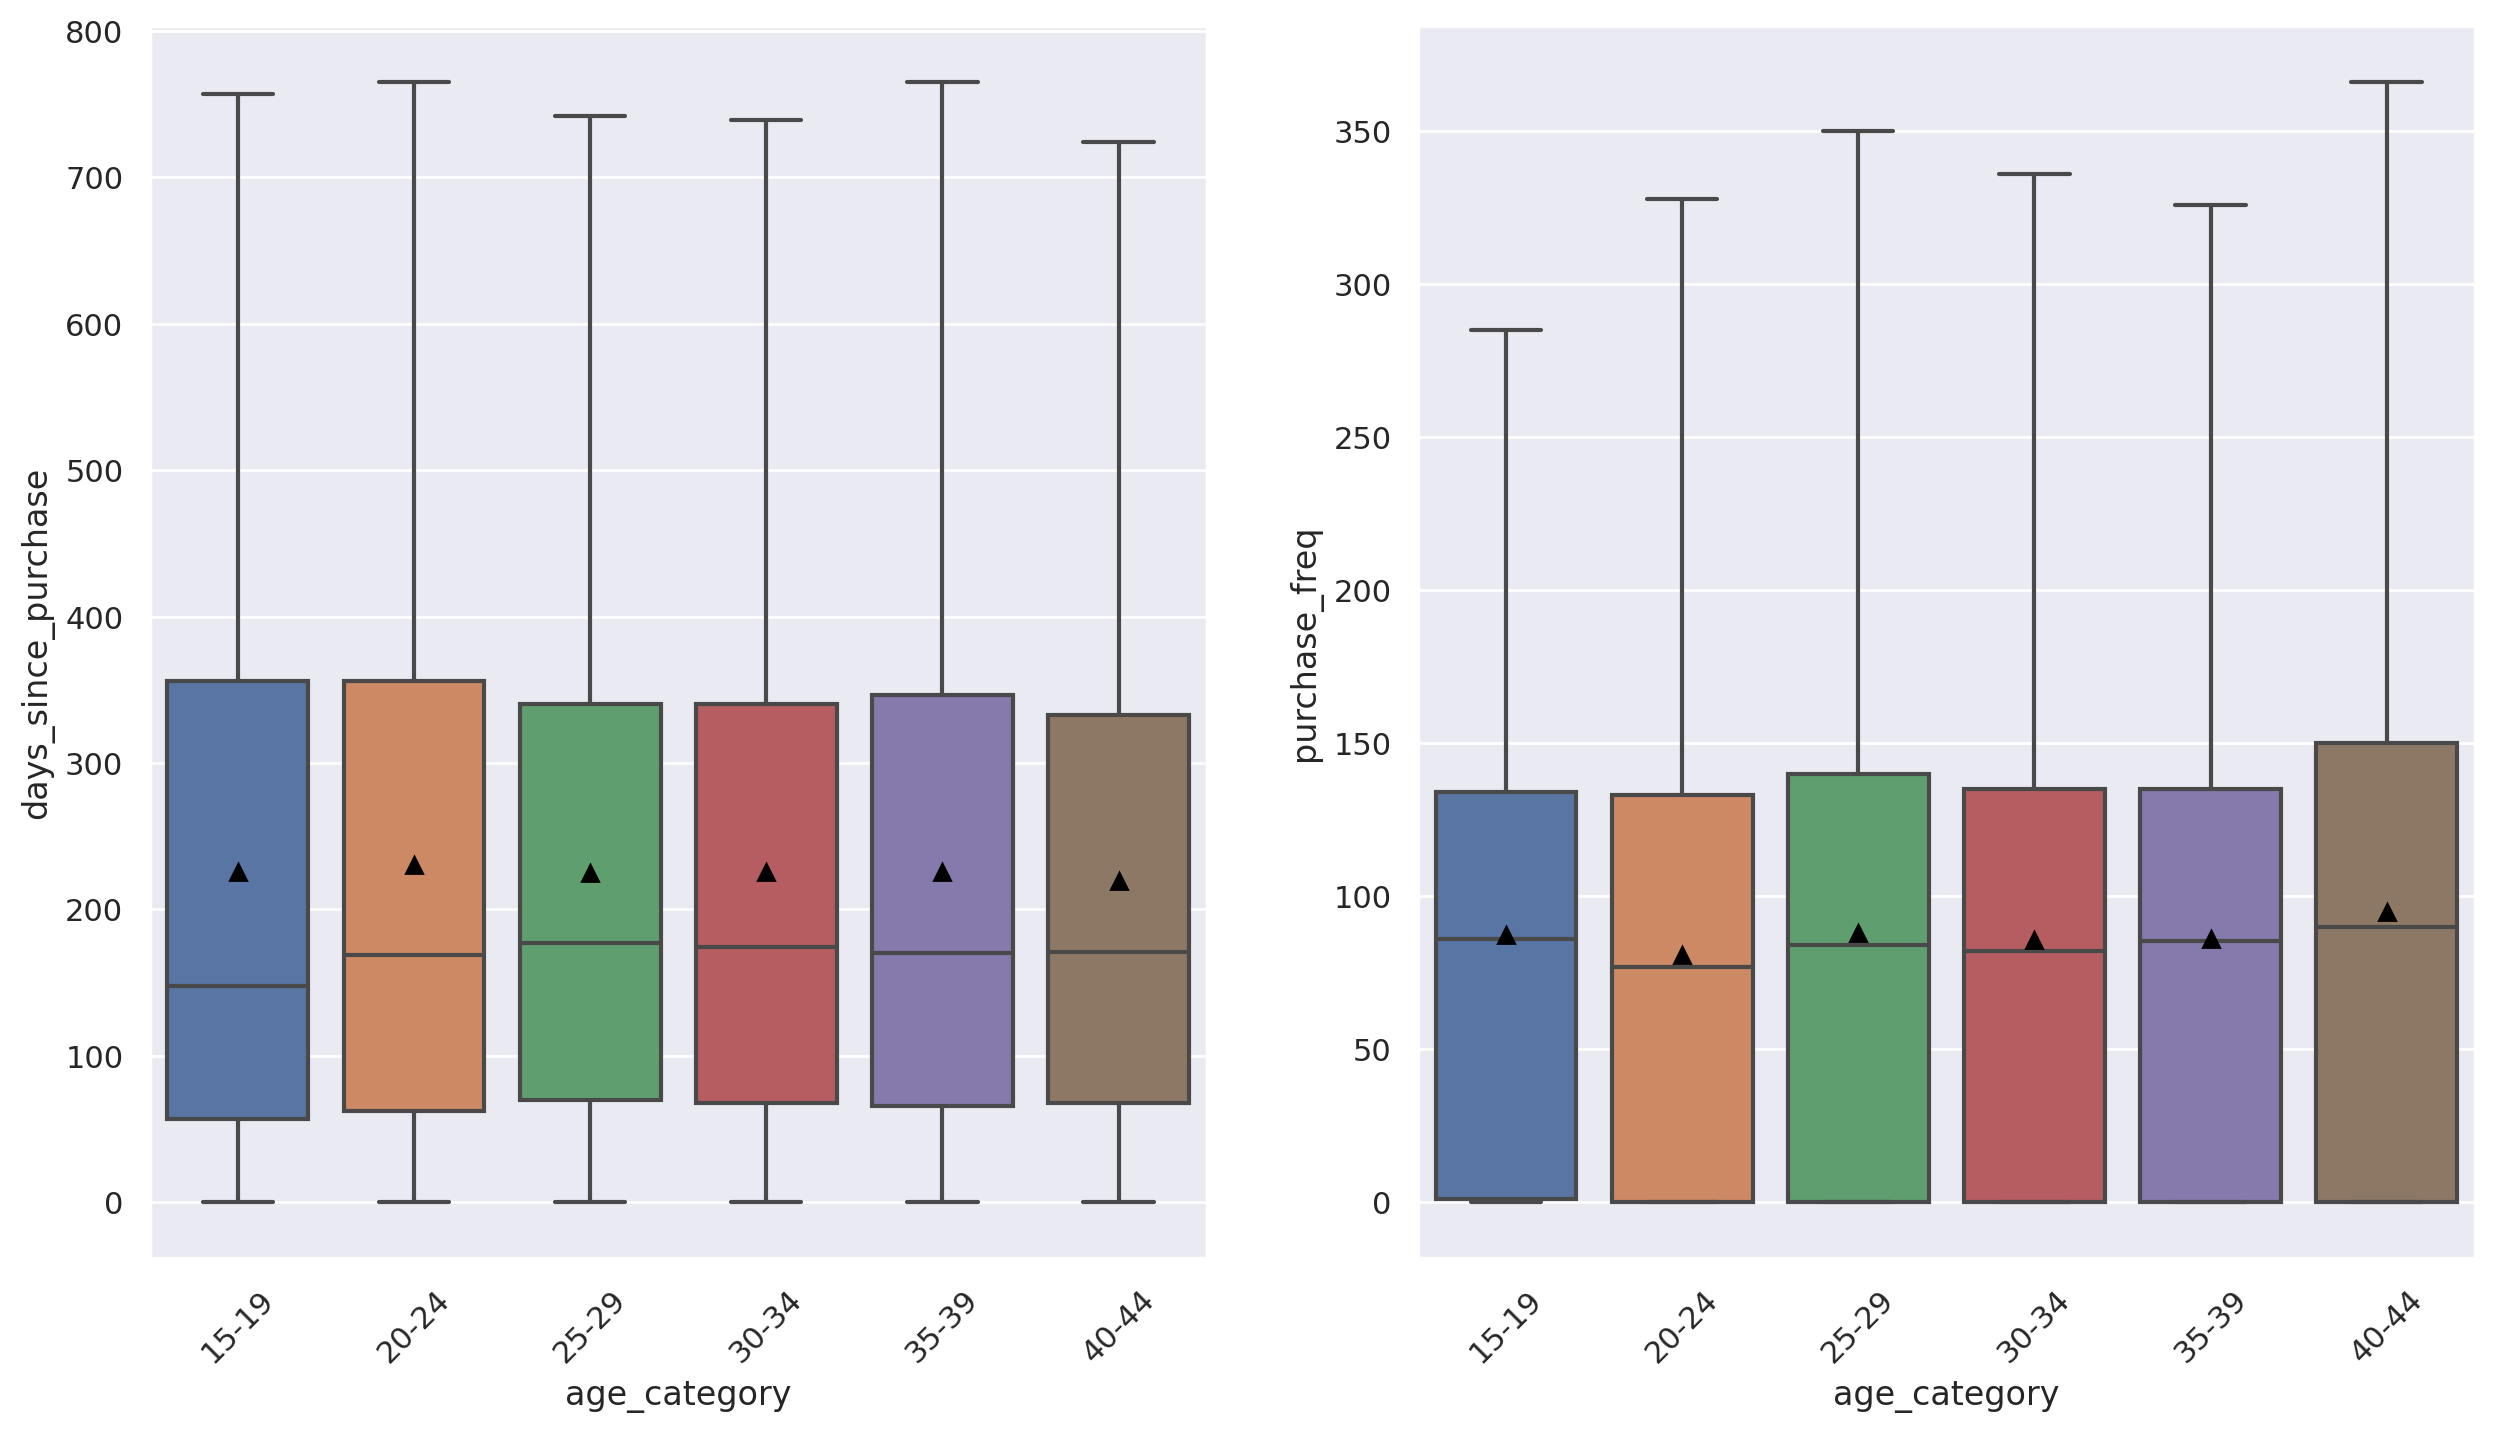

In [ ]:
# 연령대 박스플롯
fig, ax = plt.subplots(1,2, figsize=(15, 8))

# 구매 경과일
c1 = sns.boxplot(x = 'age_category', y = 'days_since_purchase',
            showmeans = True,
            meanprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'},
            showfliers=False,
            data = pur_df,
            ax=ax[0], order=['15-19', '20-24', '25-29', '30-34', '35-39', '40-44'])
c1.set_xticklabels(c1.get_xticklabels(), rotation=45)

# 구매 주기
c2 = sns.boxplot(x = 'age_category', y = 'purchase_freq',
            showmeans = True,
            meanprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'},
            showfliers=False,
            data = pur_df,
            ax=ax[1], order=['15-19', '20-24', '25-29', '30-34', '35-39', '40-44'])
c2.set_xticklabels(c1.get_xticklabels(), rotation=45)

plt.show()

In [ ]:
pur_df.groupby('age_category').describe()["days_since_purchase"]

,count,mean,std,min,25%,50%,75%,max
age_category,,,,,,,,
15-19,253.0,225.509881,206.800391,0.0,57.00,148.0,356.00,757.0
20-24,1223.0,230.685200,202.807096,0.0,62.00,169.0,356.00,765.0
25-29,1175.0,224.595745,190.331834,0.0,69.50,177.0,340.00,764.0
30-34,1210.0,225.259504,194.004013,0.0,68.00,174.0,340.00,764.0
35-39,1184.0,225.266047,193.629268,0.0,65.75,170.5,346.25,765.0
40-44,461.0,219.672451,185.315029,0.0,68.00,171.0,333.00,755.0


연령대 구간별로 확인했을 때 그룹간 차이가 보이지 않으므로 **`성by연령대`**로 한 번 더 살펴봄

<Axes: xlabel='age_category', ylabel='days_since_purchase'>

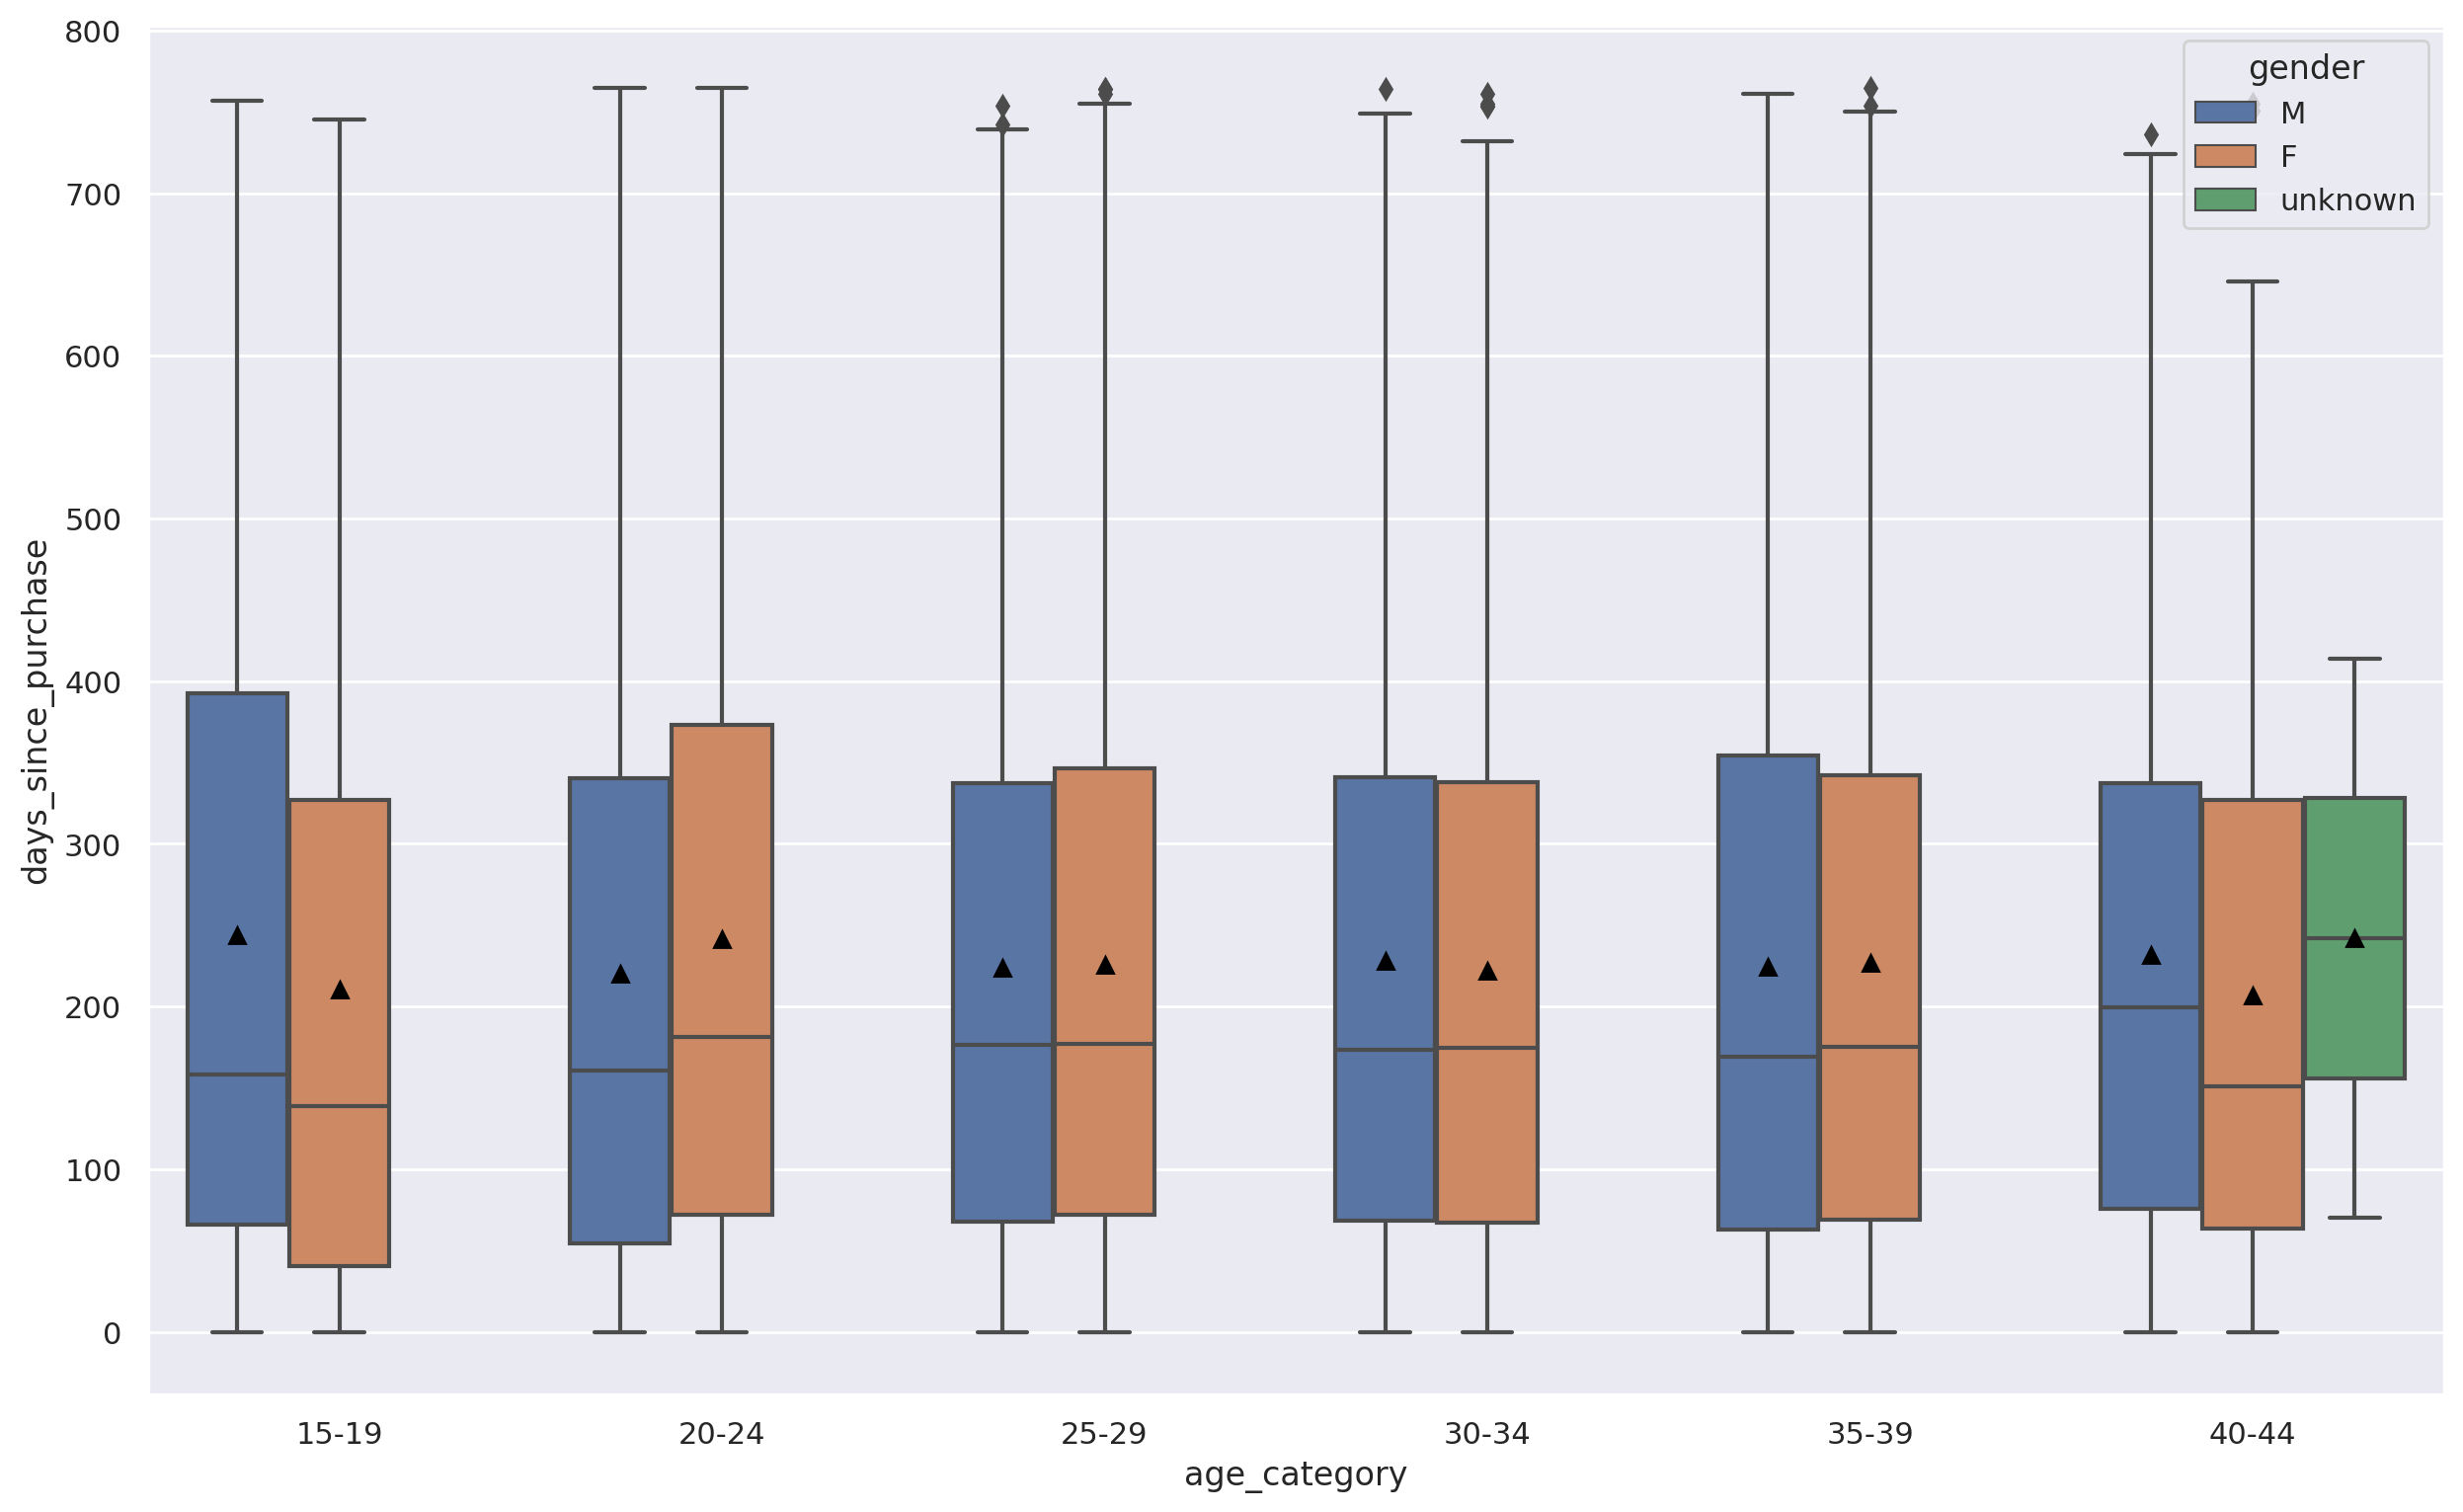

In [ ]:
# 구매 경과일 (성by연령대)
plt.figure(figsize = (15, 9))
sns.boxplot(x = 'age_category', y = 'days_since_purchase',
            showmeans = True,
            meanprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'},  # 평균 마커 색상 설정
            hue = "gender",
            data = pur_df,order=['15-19', '20-24', '25-29', '30-34', '35-39', '40-44'])

* 20대 초반의 경우, 여성이 남성보다 구매 경과일이 소폭 오래된 것으로 보임
* 30대는 남여의 구매 경과일에 큰 차이가 없는 것으로 나타남
* 40대의 경우 남성보다 여성의 구매 경과일이 짧은 것으로 보이며, 타 연령대보다 남여 차이가 큰 편임

<Axes: xlabel='age_category', ylabel='purchase_freq'>

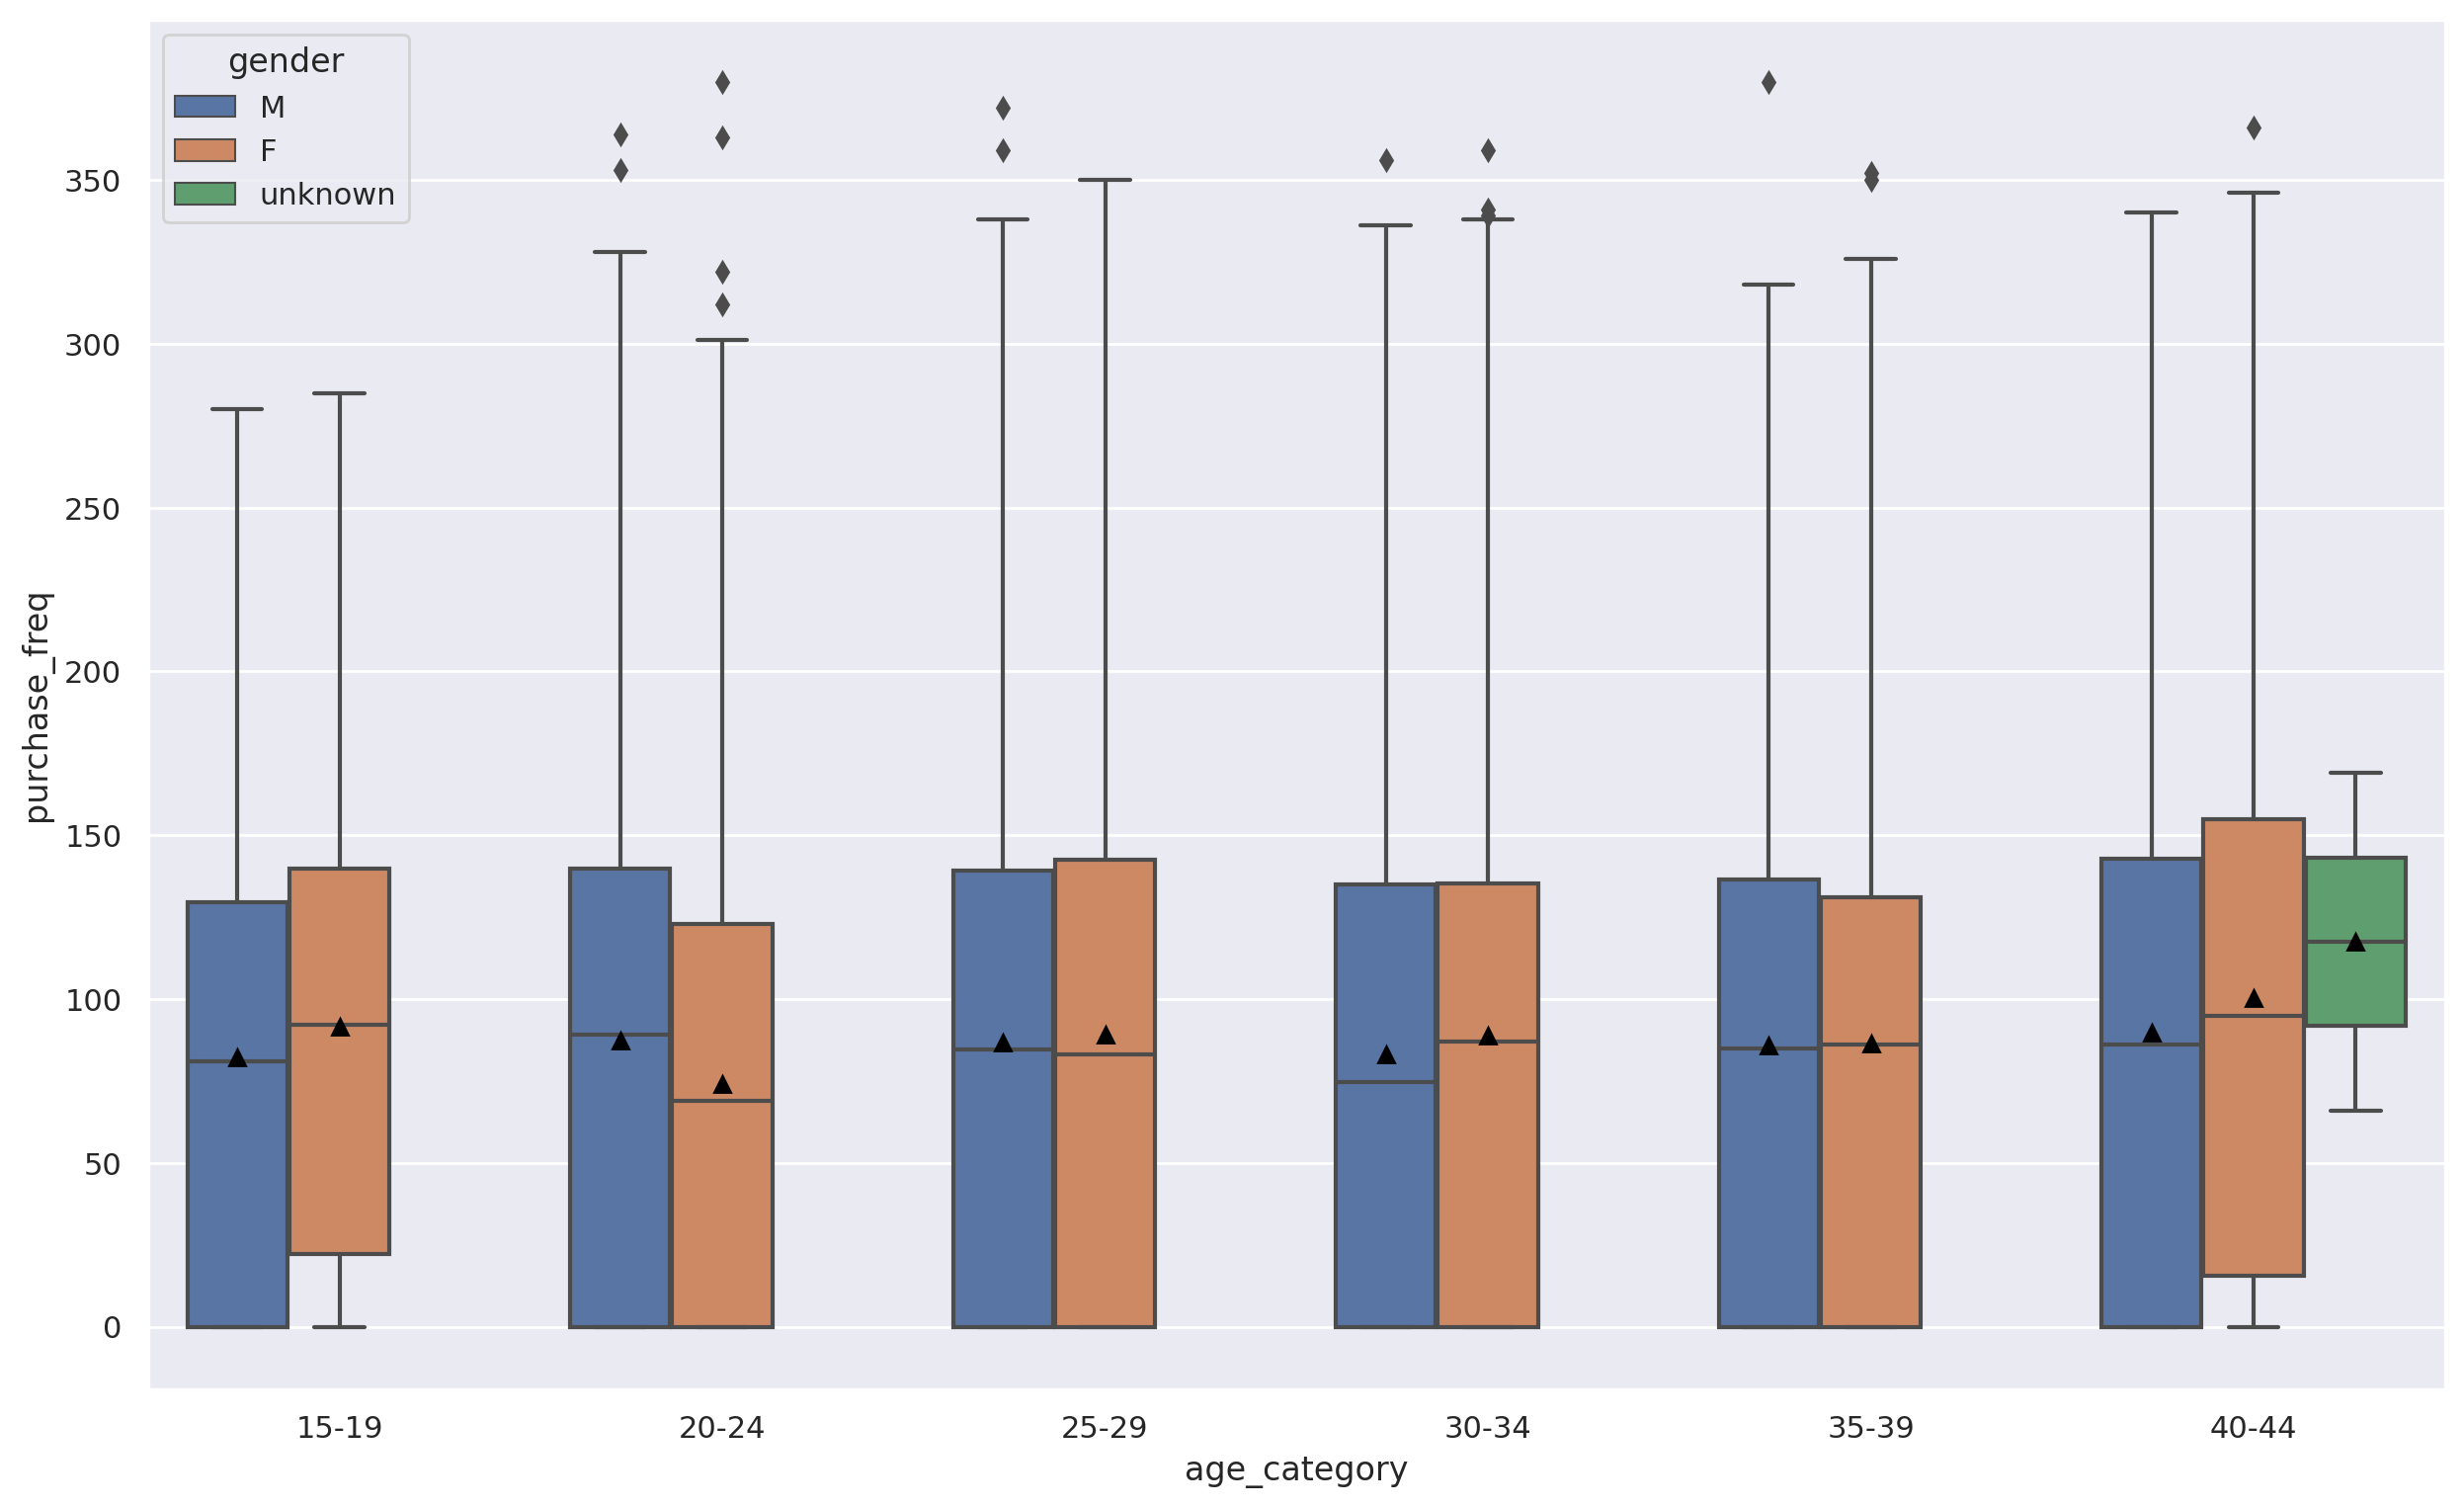

In [ ]:
# 구매 주기 (성by연령대)
plt.figure(figsize = (15, 9))
sns.boxplot(x = 'age_category', y = 'purchase_freq',
            showmeans = True,
            meanprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'},  # 평균 마커 색상 설정
            hue = "gender",
            data = pur_df,order=['15-19', '20-24', '25-29', '30-34', '35-39', '40-44'])

* 타 연령대와 다르게 20대에서만 여성보다 남성의 구매주기가 빈번한 것으로 나타남
* 주로 구매한 카테고리 등을 통해 더 살펴봐야 하겠지만, 20대는 주로 1인가구로 형성되어 있어 본인이 사용할 것을 본인이 직접 구매하는 반면, <br>
3040대 2인 이상 가구에서는 가계 담당자인 여성이 남편, 자녀의 것을 대신 구매했을 가능성을 두고 확인해 볼 필요가 있음

### 캠페인 구매 반응한 고객 수
위에서 구한 고객별 구매 경과일수를 기준으로 구매 경과일수가 30일 이상인 고객을 대상으로 재구매 유도를 위한 캠페인을 진행하였다고 가정하겠습니다. 캠페인 2013년 12월 31일까지 구매 반응한 고객 수를 구해주세요.

In [ ]:
pur_df

,cust_id,days_since_purchase,purchase_freq,age_2011,age_category,gender
0,272172,279,110,36,35-39,M
1,269640,173,79,41,40-44,M
2,272671,681,0,37,35-39,F
3,271544,157,78,25,25-29,F
4,273203,257,0,27,25-29,M
...,...,...,...,...,...,...
5501,269582,358,0,27,25-29,F
5502,271841,453,0,24,20-24,M
5503,267764,0,0,25,25-29,M
5504,268315,216,0,23,20-24,F


In [ ]:
# 2013년 12월 31일까지 구매 반응한 고객 수 = 구매 경과일수 30일 이상인 고객 중 2013년 2월 28일 ~ 2013년 12월 31일 사이에 구매가 발생한 고객 수

# 구매 경과일 수 30일 이상인 고객
upto30d = pur_df[(pur_df['days_since_purchase']>=30)]
upto30d

# # 2013년 2월 28일 ~ 2013년 12월 31일 사이에 구매가 발생한 고객
## df에 upto30d 결합하기
merge_df = upto30d.merge(df, on='cust_id', how='left')


In [ ]:
## merge_df에서 2013년 2월 28일 ~ 2013년 12월 31일 사이에 'order_status'가 "Ordered"인 고객의 수
merge_df_n = merge_df[(merge_df['tran_date']>'2013-02-28') & (merge_df['tran_date']<'2013-12-31')]
merge_df_n = merge_df_n[merge_df_n["order_status"]=="Ordered"]

In [ ]:
merge_df_n[['cust_id','tran_date','order_status','days_since_purchase']]

,cust_id,tran_date,order_status,days_since_purchase
2,272172,2013-12-13,Ordered,279
8,269640,2013-05-11,Ordered,173
10,269640,2013-09-28,Ordered,173
14,272671,2013-10-25,Ordered,681
15,272671,2013-08-05,Ordered,681
...,...,...,...,...
19603,273473,2013-06-27,Ordered,369
19611,269804,2013-12-16,Ordered,454
19621,271607,2013-07-16,Ordered,385
19640,274899,2013-08-14,Ordered,680


In [ ]:
# 캠페인에 반응한 고객 수
merge_df_n["cust_id"].nunique()

2976

In [ ]:
# 구매경과일수 30일 이상인 고객들 중 캠페인에 반응한 고객의 비율
f"캠페인에 반응한 고객 비율 {(merge_df_n['cust_id'].nunique() / upto30d['cust_id'].nunique())*100:.2f}%"

'캠페인에 반응한 고객 비율 63.58%'

### 요일별 구매 건수 차이 확인

In [ ]:
# tran_date에서 요일 추출하여 컬럼 만들기
df['day_of_week'] = df['tran_date'].dt.day_name()
print(df[['tran_date', 'day_of_week']])

       tran_date day_of_week
0     2011-08-02     Tuesday
1     2013-05-11    Saturday
2     2013-10-25      Friday
3     2011-03-28      Monday
4     2013-08-01    Thursday
...          ...         ...
22928 2012-01-20      Friday
22929 2013-02-04      Monday
22930 2014-01-14     Tuesday
22931 2014-01-11    Saturday
22932 2012-12-11     Tuesday

[22933 rows x 2 columns]


In [ ]:
# 구매한 데이터만 확인
df_order = df[df['order_status']=="Ordered"]
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20876 entries, 0 to 22932
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cust_id            20876 non-null  int64         
 1   dob                20876 non-null  datetime64[ns]
 2   age                20876 non-null  int64         
 3   age_2011           20876 non-null  int64         
 4   age_category       20876 non-null  category      
 5   gender             20876 non-null  object        
 6   city_code          20876 non-null  float64       
 7   order_status       20876 non-null  object        
 8   confirmed_yn       20876 non-null  float64       
 9   transaction_id     20876 non-null  int64         
 10  tran_date          20876 non-null  datetime64[ns]
 11  prod_cat_code      20876 non-null  int64         
 12  prod_sub_cat_code  20876 non-null  int64         
 13  prod_cat           20876 non-null  object        
 14  prod_s

In [ ]:
# 요일별 구매건수
df_order['day_of_week'].value_counts()

Friday       3035
Sunday       3027
Thursday     3017
Wednesday    2993
Saturday     2959
Tuesday      2929
Monday       2916
Name: day_of_week, dtype: int64

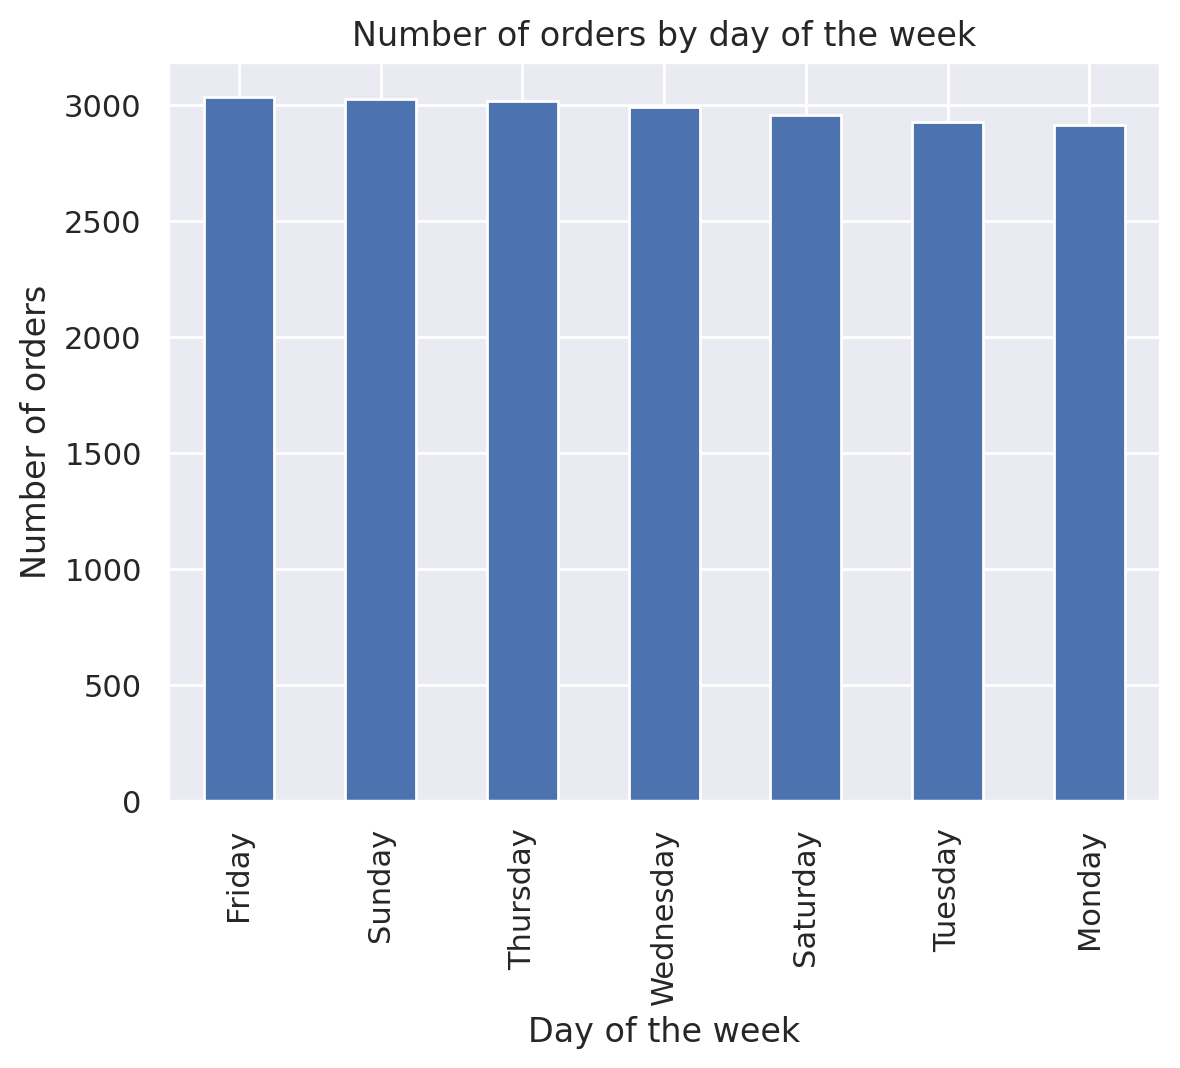

In [ ]:
# 막대그래프 시각화
df_order['day_of_week'].value_counts().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')
plt.title('Number of orders by day of the week')
plt.show()

### 2011~2013 카테고리별 월평균 매출액
대 카테고리를 기준으로 2011년부터 2013년 월평균 매출액이 가장 높은 카테고리는 무엇인가요?

In [ ]:
# 월평균 매출액????
1. 카테고리별 월 매출액 계산 (2011-1월 가방 총 매출액 얼마, 옷 총매출 얼마... / 2011-2월 가방 총 매출액, 옷 매출액...)
    * 칼럼 "year-month (36개) / prod_cat() / total_amount
2. 카테고리 월평균 매출액 = (2011년 1월 총매출+2011년 2월 총매출+ ... + 2013년 12월 총매출)/36개월
3. 6개 대카테고리의 월평균 매출액

In [ ]:
# 2011~2013년 데이터 필터링
filtered_df = df[(df['tran_date'].dt.year >= 2011) & (df['tran_date'].dt.year <= 2013)]

In [ ]:
# tran_date에서 년월 추출
filtered_df["month"] = filtered_df["tran_date"].dt.month
filtered_df["year"] = filtered_df["tran_date"].dt.year

<ipython-input-24-fc9ae68a370e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["month"] = filtered_df["tran_date"].dt.month


In [ ]:
filtered_df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type,month,year
0,272172,1975-09-17,36,M,10.00,Ordered,1.00,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.66,301.67,e-Shop,8,2011
1,269640,1970-04-29,43,M,7.00,Ordered,1.00,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.70,6121.70,MBR,5,2013
2,272671,1974-04-01,39,F,7.00,Ordered,1.00,10861359,2013-10-25,4,4,Bags,Women,2,103,21.63,227.63,Flagship store,10,2013
3,271544,1986-05-08,25,F,5.00,Ordered,1.00,15741026,2011-03-28,5,12,Books,Academic,1,299,31.39,330.39,e-Shop,3,2011
4,273203,1984-02-29,29,M,2.00,Ordered,1.00,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.80,1281.80,e-Shop,8,2013


In [ ]:
# 연도별 df 생성
filtered_df_2011 = filtered_df[filtered_df["year"]== 2011]
filtered_df_2012 = filtered_df[filtered_df["year"]== 2012]
filtered_df_2013 = filtered_df[filtered_df["year"]== 2013]

In [ ]:
# 연도별 df 카테고리, 월별로 합계
filtered_df_2011 = filtered_df_2011.groupby(['prod_cat', "month"])[['total_amt']].sum()
filtered_df_2012 = filtered_df_2012.groupby(['prod_cat', "month"])[['total_amt']].sum()
filtered_df_2013 = filtered_df_2013.groupby(['prod_cat', "month"])[['total_amt']].sum()

In [ ]:
prod_cat = list(filtered_df["prod_cat"].unique())

In [ ]:
prod_cat

['Home and kitchen', 'Books', 'Bags', 'Clothing', 'Footwear', 'Electronics']

In [ ]:
# result_df 생성
result_df = pd.concat([filtered_df_2011, filtered_df_2012, filtered_df_2013])

In [ ]:
result_df
# 12개월*3년*6개 카테고리 = 216

total_amt
prod_cat         month           
Bags             1       28925.58
                 2       69902.30
                 3      136553.69
                 4      177791.18
                 5       77536.74
...                           ...
Home and kitchen 8      204254.83
                 9      282193.79
                 10     284474.52
                 11     232265.48
                 12     217702.68

[216 rows x 1 columns]

In [ ]:
# 월 평균 매출 구하기
import numpy as np
prod_mon_avg = []
for i in prod_cat:
  a = np.mean(result_df.loc[i]).values
  prod_mon_avg.append(a)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

In [ ]:
prod_mon_avg

[array([224803.01097222]),
 array([341885.31180556]),
 array([109989.61277778]),
 array([166151.91305556]),
 array([166962.39986111]),
 array([286007.57972222])]

In [ ]:
prod_mon_avg.index(max(prod_mon_avg))

1

In [ ]:
prod_cat[1]

'Books'

→ 월 평균 매출액 1위는 **Books**

#### **카테고리별 월평균 매출액 분산 및 표준편차**
각 카테고리에 대한 월평균 매출액과 표준 편차를 통해 현재 해당 서비스에서의 각 카테고리별 매출 성과를 판단해주세요.

In [ ]:
# 분산 구하기
prod_mon_var = []
for i in prod_cat:
  a = np.var(result_df.loc[i]).values
  prod_mon_var.append(a)

In [ ]:
# 표준편차 구하기
prod_mon_std = []
for i in prod_cat:
  a = np.std(result_df.loc[i]).values
  prod_mon_std.append(a)

In [ ]:
prod_mon_std

[array([41481.66016846]),
 array([54292.2733395]),
 array([25552.62080015]),
 array([39662.91135941]),
 array([35379.08559454]),
 array([50588.00168877])]

In [ ]:
prod_std = pd.DataFrame()

In [ ]:
prod_std["prod_cat"] = prod_cat

In [ ]:
prod_mon_std = [int(i) for i in prod_mon_std]

In [ ]:
prod_mon_var = [int(i) for i in prod_mon_var]
prod_std["prod_mon_var"] = prod_mon_var

In [ ]:
prod_std["prod_mon_std"] = prod_mon_std

In [ ]:
# 월별 평균
prod_mon_avg = [int(i) for i in prod_mon_avg]
prod_std["prod_mon_avg"] = prod_mon_avg

In [ ]:
prod_std

,prod_cat,prod_mon_std,prod_mon_var,prod_mon_avg
0,Home and kitchen,41481,1720728130,224803
1,Books,54292,2947650944,341885
2,Bags,25552,652936429,109989
3,Clothing,39662,1573146537,166151
4,Footwear,35379,1251679697,166962
5,Electronics,50588,2559145914,286007


In [ ]:
# 변동계수 구하기
prod_std["CV"]= prod_std["prod_mon_std"]/prod_std["prod_mon_avg"]

In [ ]:
final_df_cat = prod_std

In [ ]:
final_df_cat

,prod_cat,prod_mon_std,prod_mon_var,prod_mon_avg,CV
0,Home and kitchen,41481,1720728130,224803,0.18
1,Books,54292,2947650944,341885,0.16
2,Bags,25552,652936429,109989,0.23
3,Clothing,39662,1573146537,166151,0.24
4,Footwear,35379,1251679697,166962,0.21
5,Electronics,50588,2559145914,286007,0.18


In [ ]:
import plotly.express as px

# 트리맵 차트 시각화
fig = px.treemap(final_df_cat,
                 path = ['prod_cat'],
                 values = 'prod_mon_avg',
                 color = 'prod_mon_avg',
                 color_continuous_scale = 'viridis',
                 custom_data=['prod_mon_avg'])

# 트리맵에 데이터 표시
for trace in fig.data:
    trace.hovertemplate = '%{label}<br>monthly sales average: %{customdata[0]}'

fig.show()

##### **주요 발견점**
* Book : 월평균 매출액이 가장 높음과 동시에 변동계수가 가장 작으므로, 해당 쇼핑몰의 주력 카테고리라고 볼 수 있음
* Clothing : 성수기와 비성수기의 매출 차이가 크게 나타남. 새학기 시즌인 3,9월과 블랙프라이데이 시즌인 11월에 추가 기획전 등을 기획하여 매출을 극대화하는 전략이 필요할 수 있음

In [ ]:
# Clothing 세부 분석
a = result_df.loc['Clothing'].reset_index()

<Axes: xlabel='month'>

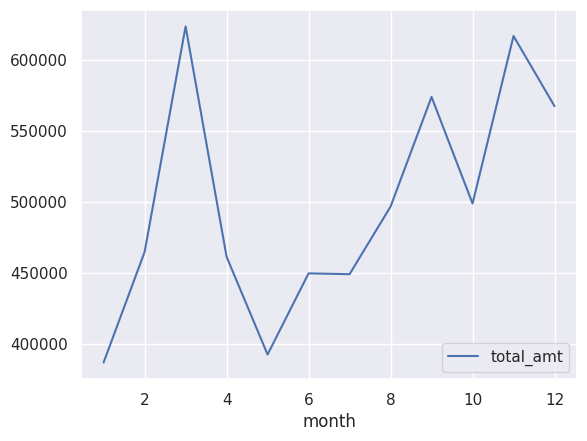

In [ ]:
a.groupby("month").sum().plot()